# **How well do jobs and skills pay for Data Analysts?**

### **Methology**
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

### **Original Exploration**
[18_Matplotlib_Box_Plots.ipynb](https://github.com/adinramaadin/Python_Project-2_Data-Job-Market/blob/main/Exploring_the_Data/17_Matplotlib_Box_Plots.ipynb)

[19_Exercise_Skill_Pay_Analysis.ipynb](https://github.com/adinramaadin/Python_Project-2_Data-Job-Market/blob/main/Exploring_the_Data/19_Seaborn.ipynb)


In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## **Salary Distribution by Job Title**

In [2]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries


df_AANZFTA = df[df['job_country'].isin(aanzfta_countries)].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_AANZFTA['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_AANZFTA_top6 = df_AANZFTA[df_AANZFTA['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_AANZFTA_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Analyst']

## **Plot Salary Distributions**

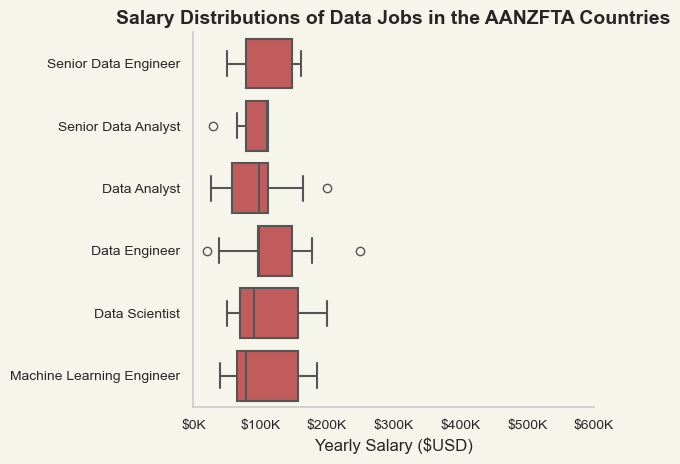

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Economist-style theme
sns.set_theme(style='whitegrid')
plt.gcf().set_facecolor('#F6F5EB')  # Set figure background color
plt.rcParams['axes.facecolor'] = '#F6F5EB'  # Set axes background color

# Define the color palette
colors = ["#D14B4B", "#A9A9A9", "#6C6C6C", "#4A4A4A", "#8B8B8B"]
sns.set_palette(sns.color_palette(colors))

# Create the boxplot
sns.boxplot(
    data=df_AANZFTA_top6, 
    x='salary_year_avg', 
    y='job_title_short', 
    order=job_order, 
    linewidth=1.5  # Add line thickness for a sharper look
)

# Title and labels with consistent formatting
plt.title('Salary Distributions of Data Jobs in the AANZFTA Countries', fontsize=14, weight='bold')
plt.xlabel('Yearly Salary ($USD)', fontsize=12)
plt.ylabel('', fontsize=12)

# Format the x-axis
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

# Remove unnecessary spines
sns.despine()

# Adjust tick font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove grid lines for a cleaner look
plt.gca().grid(False)

# Ensure tight layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


## **Investigate Median Salary Vs Skill for Data Analysts**

In [5]:
# Only get data analyst jobs in the AANZFTA Countries
df_DA_AANZFTA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'].isin(aanzfta_countries))].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_AANZFTA = df_DA_AANZFTA.dropna(subset=['salary_year_avg'])

df_DA_AANZFTA = df_DA_AANZFTA.explode('job_skills')

df_DA_AANZFTA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
120659,98500.0,r
120659,98500.0,sql
120659,98500.0,javascript
120659,98500.0,excel
120659,98500.0,spss


## **Determine The Highest Paid Skills and Most Demanded Skills**

In [6]:
df_DA_top_pay = df_DA_AANZFTA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
zoom,1,111175.0
bigquery,3,111175.0
c,1,111175.0
sheets,1,111175.0
looker,2,111175.0
flow,2,108087.5
aws,4,103750.0
github,1,102500.0
jupyter,1,102500.0


In [7]:
df_DA_skills = df_DA_AANZFTA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
bigquery,3,111175.0
flow,2,108087.5
aws,4,103750.0
sql,19,100500.0
python,11,100500.0
r,8,99500.0
excel,7,98500.0
tableau,10,93852.0
power bi,8,79000.0


C:\Users\adinr\AppData\Local\Temp\ipykernel_40372\1317523196.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], palette=custom_palette(np.linspace(0, 1, len(df_DA_top_pay))))
C:\Users\adinr\AppData\Local\Temp\ipykernel_40372\1317523196.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], palette=custom_palette(np.linspace(0, 1, len(df_DA_top_pay))))
C:\Users\adinr\AppData\Local\Temp\ipykernel_40372\1317523196.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remo

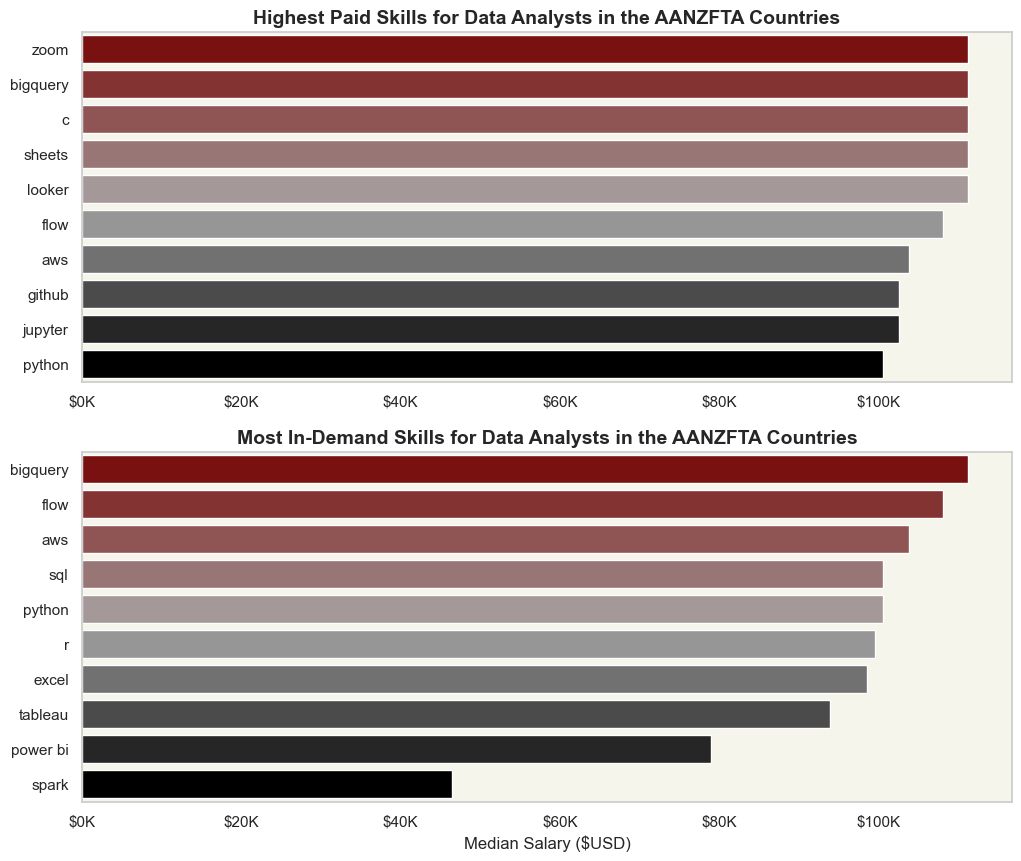

<Figure size 1000x600 with 0 Axes>

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

custom_palette = LinearSegmentedColormap.from_list(
    "RedGreyBlack", ["#8B0000", "#A9A9A9", "#000000"], N=10 
)
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#F6F5EB')
plt.rcParams['axes.facecolor'] = '#F6F5EB'


# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], palette=custom_palette(np.linspace(0, 1, len(df_DA_top_pay))))
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in the AANZFTA Countries', fontsize=14, weight='bold')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], palette=custom_palette(np.linspace(0, 1, len(df_DA_top_pay))))
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in the AANZFTA Countries', fontsize=14, weight='bold')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)', fontsize=12)
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.despine()
ax[0].grid(False)
ax[1].grid(False)
sns.set_theme(style='whitegrid')
sns.set_palette('muted')
plt.tight_layout()
plt.show()